<a href="https://colab.research.google.com/github/SURESHBEEKHANI/Advanced-LLM-Fine-Tuning/blob/main/Fine_Tune_BERT_for_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fine-Tuning BERT for Twitter Sentiment Classification with Hugging Face Transformers and TensorFlow

This project demonstrates how to fine-tune the BERT model for sentiment classification on Twitter data using Hugging Face's Transformers library and TensorFlow. The goal is to leverage the pre-trained BERT model and adapt it for classifying tweets into positive or negative sentiments, showcasing the power of transfer learning and state-of-the-art NLP techniques.

### 🧑‍💻 Project Overview:

- **Dataset**: A Twitter sentiment dataset containing labeled tweets for sentiment analysis.
- **Model**: Fine-tuning BERT, a powerful pre-trained transformer model, for sentiment classification.
- **Frameworks**: Utilized Hugging Face Transformers and TensorFlow for model training and evaluation.

### 🛠️ Tools & Technologies:

- **Hugging Face Transformers**: Pre-trained models and tokenizers for easy integration.
- **TensorFlow**: Framework used for training and evaluating the fine-tuned model.
- **BERT**: A transformer-based model that has shown state-of-the-art performance on a variety of NLP tasks.

### 🔧 Key Steps:

1. **Data Preprocessing**: Cleaned and tokenized the dataset to prepare for model input.
2. **Model Training**: Fine-tuned BERT on the Twitter sentiment data using TensorFlow.
3. **Evaluation**: Evaluated the model’s performance on a held-out test set to assess accuracy and effectiveness.

### 📊 Results:

- The fine-tuned BERT model achieved strong performance in sentiment classification.
- Compared the model’s performance with a baseline to demonstrate improvement.

### 🔗 Repository:

The complete code, along with the dataset and model weights, is available in the repository for further exploration:

- **GitHub Repository**: [GitHub Link]
- **Hugging Face Model Hub**: [Hugging Face Link]

---

### 💬 Conclusion:

By fine-tuning BERT on Twitter data, this project illustrates the power of pre-trained language models for sentiment analysis tasks, and showcases how TensorFlow and Hugging Face can be used to fine-tune complex models for specialized tasks with relatively minimal data.

In [ ]:
# Install the 'transformers' library for accessing pre-trained models from Hugging Face
# Install the 'kaggle' library for interacting with Kaggle datasets and competitions
# The '-q' flag ensures the installation process is quieter (less verbose output)
!pip install -q transformers kaggle

In [ ]:
# check for the GPU
!nvidia-smi

Sun Jan 12 13:25:45 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0              34W /  70W |   2165MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### **Download the Data From Kaggle**

In [ ]:
# Upload the Kaggle API key file ('kaggle.json') to authenticate with the Kaggle API.
# This step is necessary to access Kaggle datasets via the Kaggle API in Google Colab.
# The user will be prompted to upload the 'kaggle.json' file containing the Kaggle API key.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sureshbeekhani","key":"db42fc3f469ae7b09e2e787a21215355"}'}

In [ ]:
# Import necessary libraries
import os
import shutil

# Create the .kaggle directory in the root folder if it doesn't already exist.
# This is where the Kaggle API key file will be stored.
os.makedirs('/root/.kaggle/', exist_ok=True)

# Move the 'kaggle.json' file (which contains the Kaggle API key) to the .kaggle directory.
# This allows the Kaggle API to access the key for authentication.
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')

# Set the file permissions to 600 (read and write permissions for the owner only),
# ensuring that the Kaggle API key is kept secure.
os.chmod('/root/.kaggle/kaggle.json', 600)

In [ ]:
# Download the dataset for the specified Kaggle competition using the Kaggle API.
# The '-c' flag is followed by the competition name ('nlp-getting-started'),
# which tells the Kaggle API to fetch the dataset associated with that competition.
# This will download the competition files to the current working directory.
!kaggle competitions download -c nlp-getting-started

nlp-getting-started.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Import the zipfile library to handle ZIP file operations.
import zipfile

# Open the 'nlp-getting-started.zip' file in read mode.
# 'zip_ref' is a reference to the opened ZIP file.
# Extract all contents of the ZIP file into the 'data' directory.
with zipfile.ZipFile('nlp-getting-started.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

### Read and Explore Data

After downloading and extracting the dataset, the next step is to load and explore the data to understand its structure and contents. This process helps in identifying important features, checking for any missing values, and preparing the data for further analysis or model training.

In [ ]:
# Importing essential libraries for data science tasks
import pandas as pd  # Pandas is used for data manipulation and analysis, especially with DataFrames
import numpy as np   # NumPy provides support for numerical operations and arrays
import matplotlib.pyplot as plt  # Matplotlib is used for data visualization (creating plots and charts)

In [ ]:
# Load the training and test datasets using pandas' read_csv function
# The 'train.csv' file contains the training data, and 'test.csv' contains the test data
train_data = pd.read_csv('data/train.csv')  # Load the training dataset
test_data = pd.read_csv('data/test.csv')    # Load the test dataset

# View the first few rows of the training dataset to get an overview of its structure
train_data.head()  # Display the first 5 rows of the training data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Check and print the size (number of rows and columns) of the training dataset
print("Train data size \n", train_data.shape)  # Output the shape of the training data (rows, columns)

print()  # Print an empty line for better readability in the output

# The next line is commented out, but it would print the size of the test dataset if uncommented.
# print("Test data size \n", test_df.shape)  # Output the shape of the test data (rows, columns)

Train data size 
 (7613, 5)



In [ ]:
# Check and print the size (number of rows and columns) of the test dataset
print("Train data size \n", test_data.shape)

Train data size 
 (3263, 4)


In [ ]:
# Display the first few rows (sample) of the training dataset to inspect its structure and contents.
train_data.head()  # Shows the first 5 rows of the 'train_data' DataFrame for a quick preview

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Display the first few rows (sample) of the test dataset to inspect its structure and contents.
test_data.head()  # Shows the first 5 rows of the 'test_data' DataFrame for a quick preview

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# checking for any duplicates in the text columns
train_data['text'].duplicated().sum()

110

In [ ]:
# dropping the duplicates
train_data.drop_duplicates('text', keep='first')
train_data.shape

(7613, 5)

<Axes: xlabel='target'>

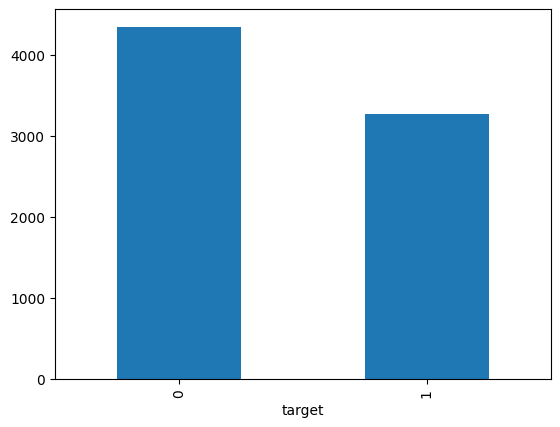

In [ ]:
# checking the target distribution
train_data.target.value_counts().plot(kind = 'bar')

We see that there is a balanaced distribution of the target levels.

In [ ]:
# checking some of the positive disaster tweets
for i in range(5):
  print(train_data[train_data.target==1]['text'].iloc[i])

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Forest fire near La Ronge Sask. Canada
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
13,000 people receive #wildfires evacuation orders in California 
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 


In [ ]:
# checking some of the neagtive disaster tweets
for i in range(5):
  print(train_data[train_data.target==0]['text'].iloc[i])

What's up man?
I love fruits
Summer is lovely
My car is so fast
What a goooooooaaaaaal!!!!!!


In [ ]:
# Exploring the text lengths
textlen = train_data['text'].apply(lambda x: len(x.split()))

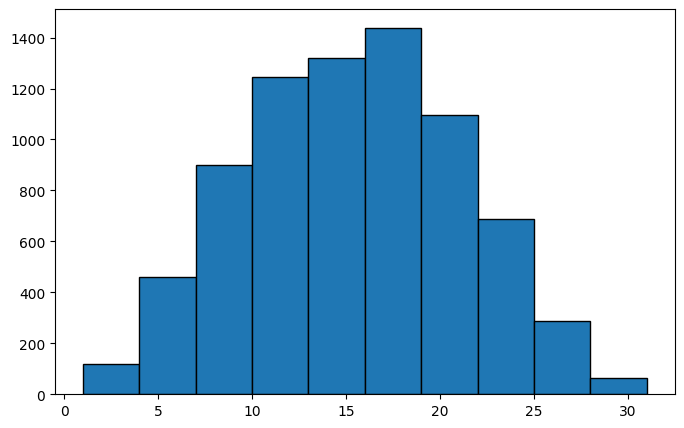

In [ ]:
# vsualize the text length
import seaborn as sns
plt.figure(figsize=(8,5))
plt.hist(textlen, edgecolor = "black");

In [ ]:
SEQ_LEN = 30

### **Fine-Tuning BERT and Downloading Tokenizer and Model**

In [ ]:
# Import the BertTokenizer from the transformers library
# The BertTokenizer is used for tokenizing text data before feeding it into a BERT model
from transformers import BertTokenizer

# Import the AutoTokenizer from the transformers library
# AutoTokenizer automatically selects the appropriate tokenizer based on the model you choose
# It is useful when you are working with multiple transformer models
from transformers import AutoTokenizer

# Import TensorFlow (tf) library
# TensorFlow is a popular machine learning framework that is commonly used for training and deploying models,
# especially deep learning models like BERT and other transformer-based models
import tensorflow as tf

# Import the TFAutoModel from the transformers library
# TFAutoModel automatically loads a TensorFlow model architecture based on the model you specify
# This is useful for working with transformer models in TensorFlow, such as BERT, GPT, etc.
from transformers import TFAutoModelForSequenceClassification

In [ ]:
# Load the pre-trained BERT tokenizer using the 'bert-base-uncased' model
# The tokenizer converts input text into a format (tokens) that can be processed by the BERT model
# 'do_lower_case=True' ensures that all input text is converted to lowercase, as BERT's 'bert-base-uncased' model is case-insensitive
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Load the pre-trained BERT model using the TFAutoModel class from Hugging Face's transformers library
# The 'bert-base-uncased' model is a version of BERT that has been trained on uncased text (i.e., lowercase only)
# TFAutoModel automatically loads the model architecture suitable for TensorFlow
Model = TFAutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Text Cleaning Before Tokenization

Before we proceed with tokenizing the text for model input, it's often beneficial to perform some text cleaning. This helps remove irrelevant information such as usernames, URLs, and special characters that may not be useful for the task at hand. For example, in the context of processing tweet text, we can remove:

In [ ]:
# Function to preprocess text by handling placeholders such as usernames and URLs
# The function performs text cleaning, such as removing usernames, URLs, and hashtags
def preprocess(text):
    new_text = []  # Initialize an empty list to hold the cleaned text tokens

    # Loop through each word in the input text
    for t in text.split(" "):
        # If the word starts with '@' (username) and its length is greater than 1, replace it with an empty string
        # This removes any usernames from the text
        t = '' if t.startswith('@') and len(t) > 1 else t

        # If the word starts with 'http' (indicating a URL), replace it with an empty string
        # This removes any URLs from the text
        t = '' if t.startswith('http') else t

        # Remove hashtags by replacing '#' with an empty string
        t = t.replace("#", "")

        # Append the processed token (word) to the new_text list, converting it to lowercase
        new_text.append(t.lower())

    # Join the cleaned tokens back into a single string, remove extra spaces, and return the final preprocessed text
    return " ".join(new_text).strip().replace("  ", " ")


In [ ]:
# Apply the 'preprocess' function to each entry in the 'text' column of the training dataset
# This will clean the tweet text by removing usernames, URLs, and hashtags
train_data['text'] = train_data['text'].apply(preprocess)

# Display the first few rows of the training dataset after preprocessing to inspect the changes
train_data.head()  # Shows the first 5 rows of the 'train_data' DataFrame with the cleaned text

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive wildfires evacuation ord...",1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1


###  **Encoding the training data using the tokenizer**

In [ ]:
# The 'text' column from the training dataset is tokenized into numerical representations suitable for the model
train_encoded_inputs = tokenizer(
    train_data['text'].tolist(),  # Convert the 'text' column into a list of text samples
    add_special_tokens=True,  # Add special tokens like [CLS] and [SEP] required by BERT
    padding='max_length',  # Pad the sequences to the maximum length (SEQ_LEN) to ensure uniform input size
    truncation=True,  # Truncate sequences that are longer than the maximum length (SEQ_LEN)
    max_length=SEQ_LEN,  # Set the maximum sequence length for the tokenized input
    return_token_type_ids=False,  # Exclude token type IDs, as they are not needed for single sequence tasks
    return_tensors='tf'  # Return the tokenized input as TensorFlow tensors
)

In [ ]:
train_encoded_inputs

{'input_ids': <tf.Tensor: shape=(7613, 30), dtype=int32, numpy=
array([[  101,  2256, 15616, ...,     0,     0,     0],
       [  101,  3224,  2543, ...,     0,     0,     0],
       [  101,  2035,  3901, ...,     0,     0,     0],
       ...,
       [  101, 23290,  1012, ...,     0,     0,     0],
       [  101,  2610, 11538, ...,  1012,   102,     0],
       [  101,  1996,  6745, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(7613, 30), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [ ]:
# Create a TensorFlow dataset from the tokenized inputs and corresponding labels (targets)
# The `from_tensor_slices` method creates a dataset where each element is a tuple of tokenized input and the label
train_dataset = tf.data.Dataset.from_tensor_slices(
    (train_encoded_inputs, train_data['target'].values)  # Pair the tokenized inputs with their corresponding target labels
)

In [ ]:
train_dataset

<_TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(30,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(30,), dtype=tf.int32, name=None)}, TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
# Function to format the data as required by the BERT model
# This function prepares the inputs in the specific format BERT expects (input_ids and attention_mask)
def map_bert(inputs, labels):
    # Extract 'input_ids' and 'attention_mask' from the tokenized inputs
    # These are the two primary inputs BERT requires:
    # - 'input_ids' are the token IDs representing the text
    # - 'attention_mask' is a binary mask that tells the model which tokens should be attended to
    inputs = {
        'input_ids': inputs['input_ids'],  # The tokenized input IDs
        'attention_mask': inputs['attention_mask']  # The attention mask
    }

    # Return the formatted inputs and the corresponding labels
    return inputs, labels


In [ ]:
# Apply the 'map_bert' function to format the dataset as required by the BERT model
# This will transform the dataset by formatting the inputs (token IDs and attention masks) for the BERT model
train_dataset = train_dataset.map(map_bert)

In [ ]:
# Iterate over the first two elements of the training dataset and print them
# 'train_dataset.take(2)' fetches the first 2 batches from the dataset
# Each batch contains the tokenized inputs (input_ids, attention_mask) and corresponding labels
for t in train_dataset.take(2):
    print(t)  # Print each batch of data (inputs and labels) for inspection

({'input_ids': <tf.Tensor: shape=(30,), dtype=int32, numpy=
array([  101,  2256, 15616,  2024,  1996,  3114,  1997,  2023,  8372,
        2089, 16455,  9641,  2149,  2035,   102,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(30,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)>}, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
({'input_ids': <tf.Tensor: shape=(30,), dtype=int32, numpy=
array([  101,  3224,  2543,  2379,  2474,  6902,  3351, 21871,  2243,
        1012,  2710,   102,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(30,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       

### Creating Train and Test Split

Before training a machine learning model, it's crucial to split the available dataset into training and testing subsets. The training data is used to train the model, while the test data is used to evaluate the model's performance on unseen data.


In [ ]:
# Shuffle the dataset and batch it for training
# 'shuffle(100000)' shuffles the dataset with a buffer size of 100,000 elements,
# ensuring the data is randomly mixed before batching for better training performance.
# 'batch(64)' groups the data into batches of 64 samples, which helps in efficient training.
dataset = train_dataset.shuffle(100000).batch(64)

In [ ]:
# Calculate the length of the dataset (total number of batches)
# The length is determined by the number of batches in the dataset
# This helps to understand how many batches will be processed during training
DS_LEN = len(dataset)

# Print the total number of batches in the dataset
DS_LEN

119

In [ ]:
# Split the dataset into training and validation sets
# We take 80% of the dataset for training and 20% for validation

SPLIT = 0.8  # Define the split ratio: 80% for training, 20% for validation

# 'take()' selects the first 80% of the dataset for training
train_ds = dataset.take(round(DS_LEN * SPLIT))

# 'skip()' skips the first 80% of the dataset, leaving the remaining 20% for validation
val_ds = dataset.skip(round(DS_LEN * SPLIT))


### **Defining the Model Architecture**


In [110]:
from transformers import TFAutoModelForSequenceClassification
import tensorflow as tf
import numpy as np

# Define the number of classes (adjust this as per your task)
n_classes = 2  # Change this to the number of unique classes in your dataset

# Input layers for the model
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), dtype=np.int32, name='input_ids')  # Input for token IDs
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), dtype=np.int32, name='attention_mask')  # Input for attention mask

# Load the pre-trained model for sequence classification with output_hidden_states=True
model = TFAutoModelForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=n_classes,
    output_hidden_states=True  # This will return the hidden states
)

# Get the model's outputs, which now include hidden states
outputs = model([input_ids, mask])

# The outputs object includes the logits and hidden states:
logits = outputs.logits  # The classification logits
hidden_states = outputs.hidden_states  # A tuple of all hidden states from the transformer

# The last hidden state is the last item in hidden_states (which has shape [batch_size, seq_len, hidden_size])
last_hidden_state = hidden_states[-1]  # This is the tensor with shape [batch_size, seq_len, hidden_size]

# Extract the embeddings corresponding to the [CLS] token (first token in the sequence)
cls_token = last_hidden_state[:, 0, :]  # Extract the embeddings of the [CLS] token

# Add additional Keras layers:
x = tf.keras.layers.BatchNormalization()(cls_token)  # Normalize the output of the [CLS] token

# Fully connected layers:
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)

# Output layer: A sigmoid activation function to predict a binary class (0 or 1)
y = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the final Keras model, specifying the inputs (input_ids and mask) and output (y)
model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

# Print the model summary
model.summary()

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 30)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 30)]                 0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_for_sequence_class  TFSequenceClassifierOutput   1094837   ['input_ids[0][0]',           
 ification_5 (TFBertForSequ  (loss=None, logits=(None,    78         'attention_mask[0][0]']      
 enceClassification)         2),                                                            

In [111]:
# Display a summary of the model architecture
# This prints the model's layers, their output shapes, and the number of parameters for each layer
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 30)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 30)]                 0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_for_sequence_class  TFSequenceClassifierOutput   1094837   ['input_ids[0][0]',           
 ification_5 (TFBertForSequ  (loss=None, logits=(None,    78         'attention_mask[0][0]']      
 enceClassification)         2),                                                            

In [112]:
# Freeze the pre-trained BERT layer to prevent it from being updated during training
# This makes the BERT layer non-trainable, so only the additional layers (Dense, Dropout, etc.) will be trained
model.layers[2].trainable = False  # Freeze the third layer (which corresponds to the BERT layer)

# Display the updated model summary to verify the layer freezing
# This helps ensure that the BERT layer is frozen and the other layers are trainable
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 30)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 30)]                 0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_for_sequence_class  TFSequenceClassifierOutput   1094837   ['input_ids[0][0]',           
 ification_5 (TFBertForSequ  (loss=None, logits=(None,    78         'attention_mask[0][0]']      
 enceClassification)         2),                                                            

### **Compile model**

In [113]:
# Import the necessary libraries
import tensorflow as tf
from transformers import AdamWeightDecay

# Set the learning rate for the optimizer (this line can be used if needed)
# learning_rate = 1e-3  # Example learning rate, which can be adjusted depending on the model performance

# Define the Adam optimizer with a learning rate of 5e-4
# Adam is a widely used optimization algorithm known for its efficiency in deep learning tasks
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4)  # Set learning rate to 5e-4

# Alternatively, you can use the AdamWeightDecay optimizer from Hugging Face transformers library
# AdamWeightDecay applies weight decay regularization, useful when fine-tuning transformer models.
# Here, we are using the same learning rate for AdamWeightDecay.
optimizer = AdamWeightDecay(learning_rate=5e-4)  # Uncomment to use AdamWeightDecay

# Define the loss function: Binary Crossentropy
# This is appropriate for binary classification tasks (e.g., sentiment classification)
loss = tf.keras.losses.BinaryCrossentropy()

# Define the metric: Binary Accuracy
# This metric evaluates the model's performance by calculating the percentage of correct predictions.
metric = tf.keras.metrics.BinaryAccuracy('accuracy')

# Compile the model by specifying the optimizer, loss function, and evaluation metric.
# This step prepares the model for training by setting up the training process.
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])


### **Train the model with specified training and validation datasets**

In [114]:
# Train the model with specified training and validation datasets

# Define a list of callbacks to improve training performance and avoid overfitting:
# 1. ReduceLROnPlateau: Reduces the learning rate when the validation loss plateaus.
#    - patience=2: Wait for 2 epochs without improvement before reducing the learning rate.
#    - factor=0.1: Reduce the learning rate by a factor of 0.1.
#    - min_delta=0.001: Minimum change in validation loss to be considered an improvement.
#    - monitor='val_loss': Monitor the validation loss to decide when to reduce the learning rate.
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.1, min_delta=0.001, monitor='val_loss'),

             # EarlyStopping: Stops training if the validation loss does not improve for a set number of epochs.
             #    - patience=5: Wait for 5 epochs without improvement before stopping.
             #    - min_delta=0.001: Minimum change in validation loss to be considered an improvement.
             #    - monitor='val_loss': Monitor the validation loss to decide when to stop training.
             tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.001, monitor='val_loss')]

# Train the model using the training and validation datasets:
# - train_ds: The training dataset.
# - validation_data: The validation dataset to evaluate the model during training.
# - epochs: The number of training epochs (3 in this case).
# - callbacks: The list of callbacks to use during training.
history = model.fit(
    train_ds,                  # Training dataset
    validation_data=val_ds,    # Validation dataset
    epochs=5,                  # Train the model for 3 epochs
    callbacks=callbacks        # Use callbacks to monitor and optimize training
)

Epoch 1/5
95/95 [==============================] - 34s 211ms/step - loss: 0.5299 - accuracy: 0.7419 - val_loss: 0.5434 - val_accuracy: 0.7873 - lr: 5.0000e-04
Epoch 2/5
95/95 [==============================] - 17s 178ms/step - loss: 0.4688 - accuracy: 0.7878 - val_loss: 0.4629 - val_accuracy: 0.8134 - lr: 5.0000e-04
Epoch 3/5
95/95 [==============================] - 17s 174ms/step - loss: 0.4553 - accuracy: 0.7965 - val_loss: 0.4225 - val_accuracy: 0.8213 - lr: 5.0000e-04
Epoch 4/5
95/95 [==============================] - 17s 174ms/step - loss: 0.4261 - accuracy: 0.8130 - val_loss: 0.3687 - val_accuracy: 0.8454 - lr: 5.0000e-04
Epoch 5/5
95/95 [==============================] - 16s 173ms/step - loss: 0.4157 - accuracy: 0.8148 - val_loss: 0.3588 - val_accuracy: 0.8461 - lr: 5.0000e-04


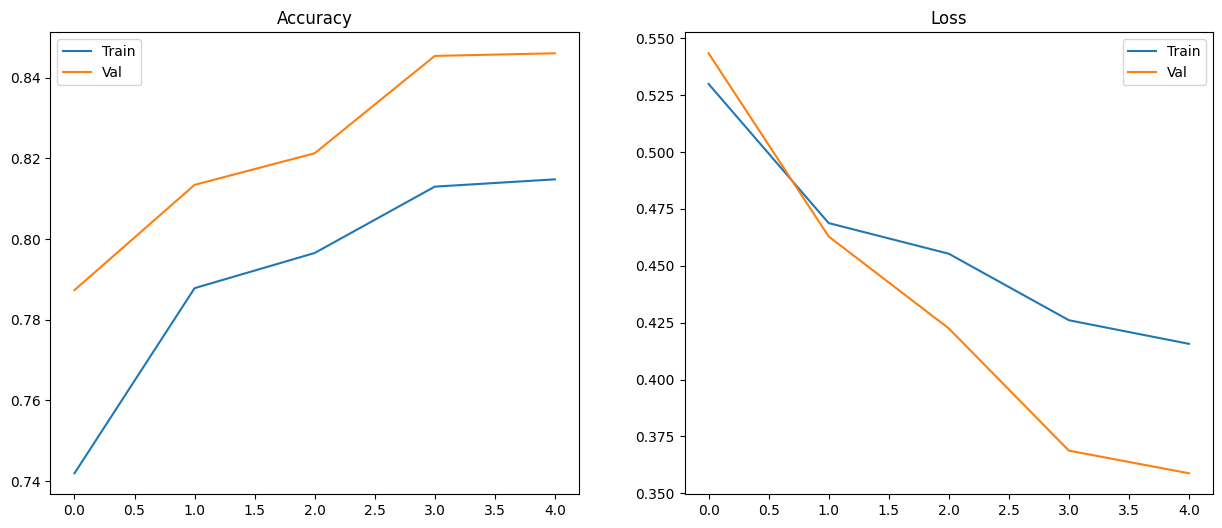

In [115]:
# Plot the performance curves for accuracy and loss during training and validation

# Extract the epoch numbers from the training history
epochs = history.epoch

# Set the figure size for the plots
plt.figure(figsize=(15, 6))

# Subplot 1: Accuracy Curve
plt.subplot(1, 2, 1)  # Create the first subplot in a 1-row, 2-column layout
# Plot the training accuracy from the history object
plt.plot(epochs, history.history['accuracy'], label="Train")
# Plot the validation accuracy from the history object
plt.plot(epochs, history.history['val_accuracy'], label="Val")
# Add a legend to differentiate between training and validation accuracy
plt.legend()
# Add a title to the accuracy plot
plt.title("Accuracy")

# Subplot 2: Loss Curve
plt.subplot(1, 2, 2)  # Create the second subplot in the same layout
# Plot the training loss from the history object
plt.plot(epochs, history.history['loss'], label="Train")
# Plot the validation loss from the history object
plt.plot(epochs, history.history['val_loss'], label="Val")
# Add a legend to differentiate between training and validation loss
plt.legend()
# Add a title to the loss plot
plt.title("Loss")

# Display the plots
plt.show()

In [116]:
# Evaluate the model on the validation dataset

# The `model.evaluate` method is used to evaluate the model's performance on a given dataset.
# It computes the loss and any specified metrics (e.g., accuracy) on the dataset.

# Input:
# - `val_ds`: The validation dataset to evaluate the model's performance on.

# Output:
# - Prints the loss and metrics (e.g., accuracy) on the validation dataset.
# - Returns the evaluation results as a list (e.g., [loss, accuracy]).

model.evaluate(val_ds)

24/24 [==============================] - 3s 138ms/step - loss: 0.3626 - accuracy: 0.8434


[0.36262163519859314, 0.8434442281723022]

In [127]:
import tensorflow as tf

# Define sentiment labels (binary classification: 0 = Negative, 1 = Positive)
sentiment_labels = {0: "Negative", 1: "Positive"}

# Step 2: Define the prediction pipeline function
def predict_sentiment(input_text):
    # Encoding the input text using the tokenizer
    encoded_input = tokenizer(input_text,
                               add_special_tokens=True,  # Add [CLS] and [SEP] tokens
                               padding='max_length',     # Pad sequences to max_length
                               truncation=True,          # Truncate sequences longer than max_length
                               max_length=30,            # Set the max length to 30 tokens
                               return_token_type_ids=False,
                               return_tensors='tf')      # Return TensorFlow tensors

    # Creating a TensorFlow dataset from the encoded input
    input_dataset = tf.data.Dataset.from_tensor_slices(dict(encoded_input))

    # Batch the data for prediction (batch size 1 for a single input)
    input_ds = input_dataset.batch(1)

    # Make predictions with the model
    predictions = model.predict(input_ds)

    # Get the predicted probability for the positive class (index 1)
    predicted_prob = predictions[0][0]  # Since we only have one output, we get the first value

    # Apply a threshold of 0.5 to determine sentiment: if > 0.5, classify as Positive
    predicted_class = 1 if predicted_prob > 0.5 else 0

    # Map the predicted class index to the sentiment label
    sentiment = sentiment_labels[predicted_class]

    # Return the sentiment and the predicted probability (logits)
    return sentiment, predicted_prob

# Step 3: Example input text for sentiment analysis
input_text = " This is the worst thing I've ever bought"  # Example text input

# Get the predicted sentiment and raw predictions for the input text
predicted_sentiment, predicted_prob = predict_sentiment(input_text)

# Output the sentiment prediction result
print(f"Predicted sentimen is {predicted_sentiment}")

1/1 [==============================] - 0s 51ms/step
Predicted sentimen is Negative
